# Importing & Storing Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr
from statsmodels.stats.weightstats import ztest
from sklearn.preprocessing import PowerTransformer
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
df = pd.read_csv('alzheimers_disease_data.csv')

Copying data for operations

In [ ]:
new = df.copy()
new.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [ ]:
new = new.drop(['DoctorInCharge', 'PatientID'], axis = 1)
new.shape

(2149, 33)

# Outlier Work

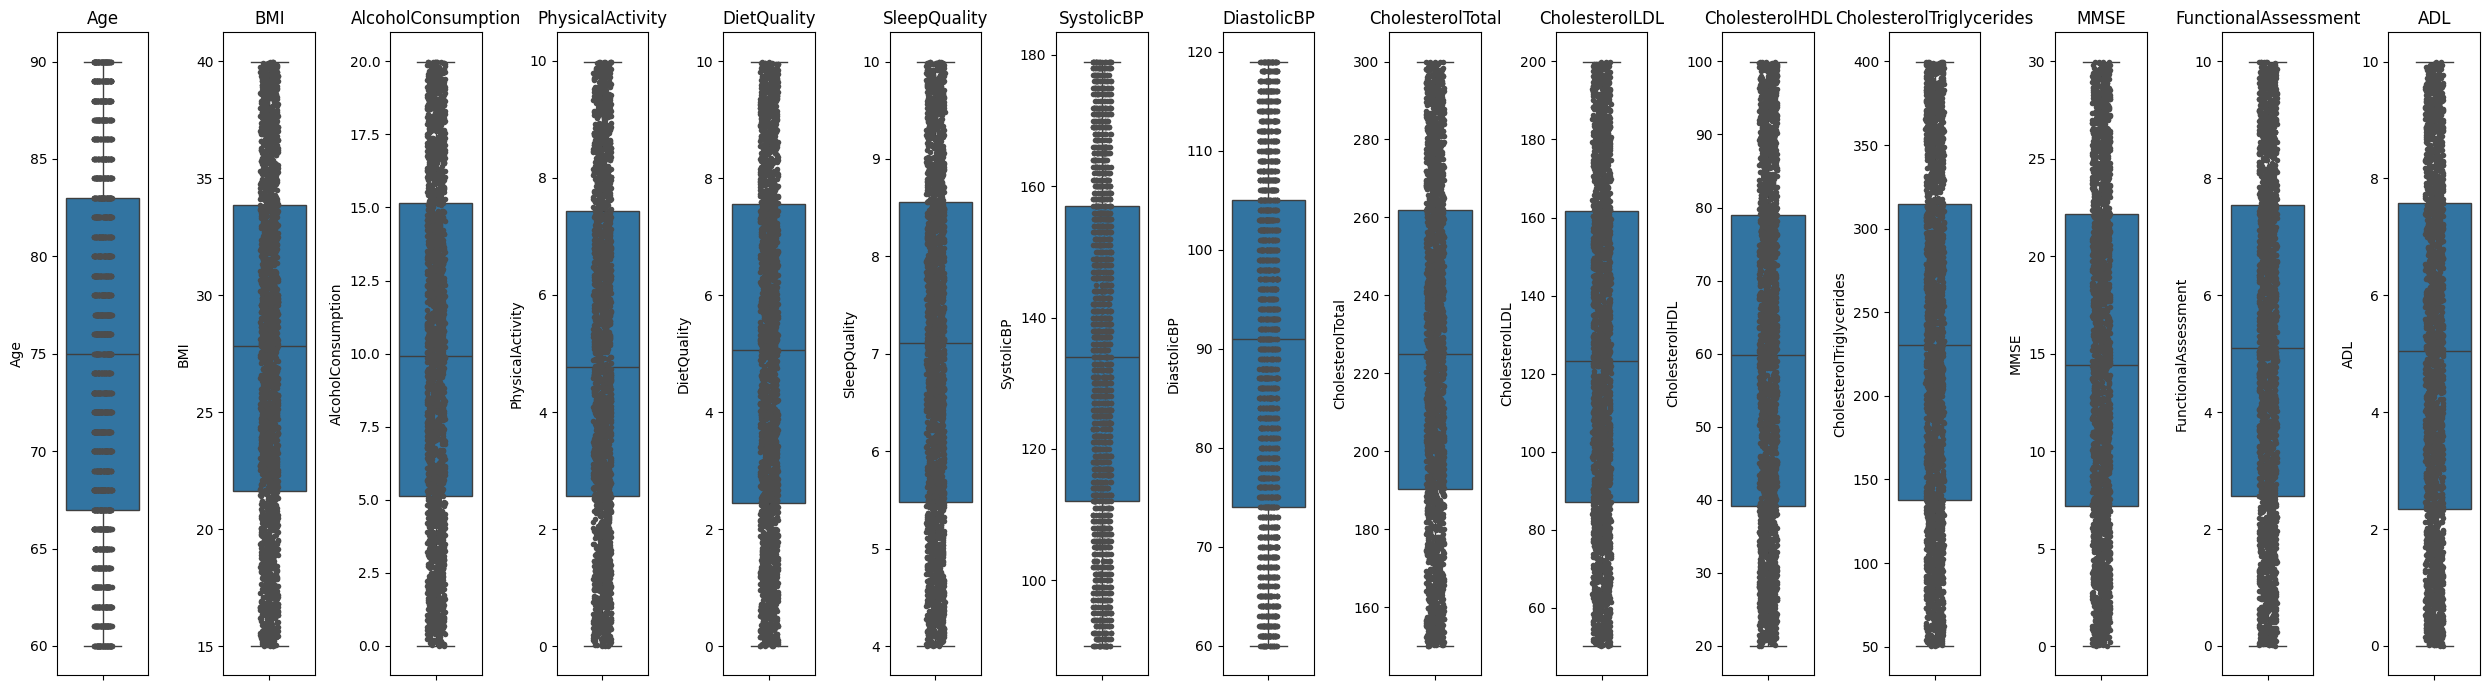

In [ ]:
columns_to_plot = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
                   'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
                   'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
                   'FunctionalAssessment', 'ADL']

fig, axes = plt.subplots(figsize=(25,7), ncols=len(columns_to_plot))

for column, axis in zip(columns_to_plot, axes):
    sns.boxplot(data=df[column], ax=axis)
    axis.set_title(column)
    sns.stripplot(data=df[column], ax=axis, size=4, color=".3")

plt.tight_layout()
plt.show()

In [ ]:
columns_to_process = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
                   'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
                   'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
                   'FunctionalAssessment', 'ADL']

for i in columns_to_process:
    q1 = new[i].quantile(0.25)
    q3 = new[i].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + (iqr * 1.5)
    ll = q1 - (iqr * 1.5)
    new = new.loc[(new[i] > ll) | (new[i] < ul)]

new.shape

(2149, 33)

No outlier present

# Hypothesis 1:

Do people who are diagnosed with alzheimers older?

H0: There is no difference in age with respect to Alzheimer's diagnosis, H1: There is significant difference in age with respect to Alzheimer's Diagnosis

Two Numerical Samples: T test, Z test

In [ ]:
data = new.copy()
data = data.loc[:, df.columns.intersection(['Age','Diagnosis'])]
data.head()

,Age,Diagnosis
0,73,0
1,89,0
2,73,0
3,74,0
4,89,0


Checking Skewness

In [ ]:
data['Age'].skew()

0.04596434063152629

Checking if data is normally distributed

T-Test

In [ ]:
diagnosed = data[data['Diagnosis'] == 1]
notdiagnosed = data[data['Diagnosis'] == 0]

t_stat, p_value = stats.ttest_ind(diagnosed['Age'], notdiagnosed['Age'])

if p_value < 0.05:
    print(f"There is significant difference in age regardless of Alzheimer's (p-value = {p_value})")
else:
    print(f"There is no significant difference in age regardless of Alzheimer's (p-value = {p_value})")
print(f"Diagnosed: Proportion with Alzheimer's disease = {diagnosed['Age'].mean()}, n = {len(diagnosed)}")
print(f"Not Diagnosed: Proportion with Alzheimer's disease = {notdiagnosed['Age'].mean()}, n = {len(notdiagnosed)}")

There is no significant difference in age regardless of Alzheimer's (p-value = 0.799279022412382)
Diagnosed: Proportion with Alzheimer's disease = 74.84210526315789, n = 760
Not Diagnosed: Proportion with Alzheimer's disease = 74.94528437724982, n = 1389


Z-Test

In [ ]:
diagnosed = data[data['Diagnosis'] == 1]
notdiagnosed = data[data['Diagnosis'] == 0]

z_stat, p_value = ztest(diagnosed['Age'], notdiagnosed['Age'])

if p_value < 0.05:
    print(f"There is significant difference in age regardless of Alzheimer's (p-value = {p_value})")
else:
    print(f"There is no significant difference in age regardless of Alzheimer's (p-value = {p_value})")
print(f"Diagnosed: Proportion with Alzheimer's disease = {diagnosed['Age'].mean()}, n = {len(diagnosed)}")
print(f"Not Diagnosed: Proportion with Alzheimer's disease = {notdiagnosed['Age'].mean()}, n = {len(notdiagnosed)}")

There is no significant difference in age regardless of Alzheimer's (p-value = 0.7992546689347748)
Diagnosed: Proportion with Alzheimer's disease = 74.84210526315789, n = 760
Not Diagnosed: Proportion with Alzheimer's disease = 74.94528437724982, n = 1389


Non parametric test

In [ ]:
diagnosed = data[data['Diagnosis'] == 1]['Age']
notdiagnosed = data[data['Diagnosis'] == 0]['Age']

statistic, p_value = stats.mannwhitneyu(diagnosed, notdiagnosed, alternative='two-sided')

if p_value < 0.05:
    print(f"There is significant difference in age regardless of Alzheimer's (p-value = {p_value})")
else:
    print(f"There is no significant difference in age regardless of Alzheimer's (p-value = {p_value})")
print(f"Diagnosed: Proportion with Alzheimer's disease = {diagnosed.mean()}, n = {len(diagnosed)}")
print(f"Not Diagnosed: Proportion with Alzheimer's disease = {notdiagnosed.mean()}, n = {len(notdiagnosed)}")

There is no significant difference in age regardless of Alzheimer's (p-value = 0.7905593814888701)
Diagnosed: Proportion with Alzheimer's disease = 74.84210526315789, n = 760
Not Diagnosed: Proportion with Alzheimer's disease = 74.94528437724982, n = 1389


After performing three tests, we arrive at the same conclusion always, that is there is no significant difference in the age of patients regardless of Alzheimer's diagnosis

# Hypothesis 2:

Do people drink just as much regardless of Alzheimers?

H1: There is significant differnce between people who drink more based on diagnosis, H1: There is no significant difference between people who drink based on diagnosis

Two Numerical Samples: Z test, T test

In [ ]:
data = new.copy()
data = data.loc[:, df.columns.intersection(['AlcoholConsumption','Diagnosis'])]
data.head()

,AlcoholConsumption,Diagnosis
0,13.297218,0
1,4.542524,0
2,19.555085,0
3,12.209266,0
4,18.454356,0


In [ ]:
alcmean = data['AlcoholConsumption'].mean()

In [ ]:
data['AlcoholConsumption'].skew()

0.018414566988674438

T-test

In [ ]:
diagnosed = data[data['Diagnosis'] == 1]
not_diagnosed = data[data['Diagnosis'] == 0]

t_stat, p_val = stats.ttest_ind(diagnosed['AlcoholConsumption'], not_diagnosed['AlcoholConsumption'])

if p_value < 0.05:
    print(f"There is evidence Alzheimer's patients drink more (p-value = {p_value})")
else:
    print(f"There is no sufficient evidence that Alzheimer's patients drink more (p-value = {p_value})")
print(f"More Drinking: Proportion with Alzheimer's disease = {diagnosed['AlcoholConsumption'].mean()}, n = {len(diagnosed)}")
print(f"Less Drinking: Proportion with Alzheimer's disease = {not_diagnosed['AlcoholConsumption'].mean()}, n = {len(not_diagnosed)}")

There is no sufficient evidence that Alzheimer's patients drink more (p-value = 0.7992546689347748)
More Drinking: Proportion with Alzheimer's disease = 9.9801563679739, n = 760
Less Drinking: Proportion with Alzheimer's disease = 10.07188005238948, n = 1389


Z test

In [ ]:
diagnosed = data[data['Diagnosis'] == 1]
not_diagnosed = data[data['Diagnosis'] == 0]

z_stat, p_value = ztest(diagnosed['AlcoholConsumption'], not_diagnosed['AlcoholConsumption'])

if p_value < 0.05:
    print(f"There is evidence Alzheimer's patients drink more (p-value = {p_value})")
else:
    print(f"There is no sufficient evidence that Alzheimer's patients drink more (p-value = {p_value})")
print(f"More Drinking: Proportion with Alzheimer's disease = {diagnosed['AlcoholConsumption'].mean()}, n = {len(diagnosed)}")
print(f"Less Drinking: Proportion with Alzheimer's disease = {not_diagnosed['AlcoholConsumption'].mean()}, n = {len(not_diagnosed)}")

There is no sufficient evidence that Alzheimer's patients drink more (p-value = 0.7240926521348919)
More Drinking: Proportion with Alzheimer's disease = 9.9801563679739, n = 760
Less Drinking: Proportion with Alzheimer's disease = 10.07188005238948, n = 1389


Mann-Whitney U Test

In [ ]:
diagnosed = data[data['Diagnosis'] == 1]
not_diagnosed = data[data['Diagnosis'] == 0]

statistic, p_value = stats.mannwhitneyu(diagnosed['AlcoholConsumption'], not_diagnosed['AlcoholConsumption'], alternative='two-sided')

if p_value < 0.05:
    print(f"There is evidence Alzheimer's patients drink more (p-value = {p_value})")
else:
    print(f"There is no sufficient evidence that Alzheimer's patients drink more (p-value = {p_value})")
print(f"More Drinking: Proportion with Alzheimer's disease = {diagnosed['AlcoholConsumption'].mean()}, n = {len(diagnosed)}")
print(f"Less Drinking: Proportion with Alzheimer's disease = {not_diagnosed['AlcoholConsumption'].mean()}, n = {len(not_diagnosed)}")

There is no sufficient evidence that Alzheimer's patients drink more (p-value = 0.6891866003991506)
More Drinking: Proportion with Alzheimer's disease = 9.9801563679739, n = 760
Less Drinking: Proportion with Alzheimer's disease = 10.07188005238948, n = 1389


Conclusion: From these tests, we derive that the drinking habits of those with Alzheimers do not differ from other who have not been diagnosed with Alzheimers.

# Hypothesis 3:

Is one gender more prone to Alzheimers than the other?

H0: Gender does not have an influence on Alzheimers, H1: Gender has an influence on Alzheimers

Two Categorical Values: Chi Sqaure Test, Z test for proportion

In [ ]:
data = new.copy()
data = data.loc[:, df.columns.intersection(['Gender','Diagnosis'])]
data.head()

,Gender,Diagnosis
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


In [ ]:
data['Gender'].skew()

-0.025147506342251567

Z Test for proportion

In [ ]:
male = data[data['Gender'] == 0]
female = data[data['Gender'] == 1]

count = np.array([
    len(male[male['Diagnosis'] == 1]),
    len(female[female['Diagnosis'] == 1])
])
nobs = np.array([len(male), len(female)])

z_stat, p_value = proportions_ztest(count, nobs)

if p_value < 0.05:
    print(f"There is evidence that one gender has a higher risk of Alzheimer's (p-value = {p_value})")
else:
    print(f"There is no sufficient evidence that one gender has a higher risk of Alzheimer's (p-value = {p_value})")
print(f"Male: Proportion with Alzheimer's disease = {male['Diagnosis'].mean()}, n = {len(male)}")
print(f"Female: Proportion with Alzheimer's disease = {female['Diagnosis'].mean()}, n = {len(female)}")

There is no sufficient evidence that one gender has a higher risk of Alzheimer's (p-value = 0.33088585539179394)
Male: Proportion with Alzheimer's disease = 0.36380772855796417, n = 1061
Female: Proportion with Alzheimer's disease = 0.34375, n = 1088


Chi Square

In [ ]:
contingency_table = pd.crosstab(data['Gender'], data['Diagnosis'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
if p_value < 0.05:
    print(f"There is evidence that one gender has a higher risk of Alzheimer's (p-value = {p_value})")
else:
    print(f"There is no sufficient evidence that one gender has a higher risk of Alzheimer's (p-value = {p_value})")
print(f"Male: Proportion with Alzheimer's disease = {male['Diagnosis'].mean()}, n = {len(male)}")
print(f"Female: Proportion with Alzheimer's disease = {female['Diagnosis'].mean()}, n = {len(female)}")

There is no sufficient evidence that one gender has a higher risk of Alzheimer's (p-value = 0.35381831348465786)
Male: Proportion with Alzheimer's disease = 0.36380772855796417, n = 1061
Female: Proportion with Alzheimer's disease = 0.34375, n = 1088


Conclusion: In this case, Chi Square is the most reliable for us given the parameters. Hence, this test concludes there isn't sufficient information to prove that one gender is at a higher risk (proportion) for Alzheimer's than the other gender.

# Hypothesis 4:

Do people with a family history of alzheimers at a higher risk of Alzheimers?

H0: Family history of Alzheimers does not influence Alzheimers, H1: Family history of Alzheimers influences Alzheimers

Two Categorical Values: Chi Sqaure Test, Z test for proportion

In [ ]:
data = new.copy()
data = data.loc[:, df.columns.intersection(['FamilyHistoryAlzheimers','Diagnosis'])]
data.head()

,FamilyHistoryAlzheimers,Diagnosis
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [ ]:
data['FamilyHistoryAlzheimers'].skew()

1.1419453698287734

Z Test for Proportions

In [ ]:
with_alz = data[data['FamilyHistoryAlzheimers'] == 1]
without_alz = data[data['FamilyHistoryAlzheimers'] == 0]

count = np.array([
    len(with_alz[with_alz['Diagnosis'] == 1]),
    len(without_alz[without_alz['Diagnosis'] == 1])
])
nobs = np.array([len(with_alz), len(without_alz)])

z_stat, p_value = proportions_ztest(count, nobs)

if p_value < 0.05:
    print(f"There is evidence that having a family history of alzheimers leads to a higher risk of Alzheimer's (p-value = {p_value})")
else:
    print(f"There is no sufficient evidence that having a family history of alzheimers leads to a higher risk of Alzheimer' (p-value = {p_value})")
print(f"With Family History of Alzheimers: Proportion with Alzheimer's disease = {with_alz['Diagnosis'].mean()}, n = {len(with_alz)}")
print(f"Without Family History of Alzheimers: Proportion with Alzheimer's disease = {without_alz['Diagnosis'].mean()}, n = {len(without_alz)}")

There is no sufficient evidence that having a family history of alzheimers leads to a higher risk of Alzheimer' (p-value = 0.12722325266073925)
With Family History of Alzheimers: Proportion with Alzheimer's disease = 0.32656826568265684, n = 542
Without Family History of Alzheimers: Proportion with Alzheimer's disease = 0.3627878033602987, n = 1607


Chi Square

In [ ]:
contingency_table = pd.crosstab(data['FamilyHistoryAlzheimers'], data['Diagnosis'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print(f"There is evidence that having a family history of alzheimers leads to a higher risk of Alzheimer's (p-value = {p_value})")
else:
    print(f"There is no sufficient evidence that having a family history of alzheimers leads to a higher risk of Alzheimer' (p-value = {p_value})")

print(f"With Family History of Alzheimers: Proportion with Alzheimer's disease = {with_alz['Diagnosis'].mean()}, n = {len(with_alz)}")
print(f"Without Family History of Alzheimers: Proportion with Alzheimer's disease = {without_alz['Diagnosis'].mean()}, n = {len(without_alz)}")

There is no sufficient evidence that having a family history of alzheimers leads to a higher risk of Alzheimer' (p-value = 0.14069795394928386)
With Family History of Alzheimers: Proportion with Alzheimer's disease = 0.32656826568265684, n = 542
Without Family History of Alzheimers: Proportion with Alzheimer's disease = 0.3627878033602987, n = 1607


Conclusion: In this case, Chi Square is the most reliable for us given the parameters. Hence, this test concludes there isn't sufficient information to prove that a family history of Alzheimer's leads to a higher risk of being diagnosed with Alzheimers.

# Hypothesis 5:

Does smoking lead to a higher risk of alzheimers?

H0: Smoking does not increase the risk of Alzheimers, H1: Smoking increases the risk of Alzheimers

Two Categorical Values: Chi Sqaure Test, Z test for proportion

In [ ]:
data = new.copy()
data = data.loc[:, df.columns.intersection(['Smoking','Diagnosis'])]
data.head()

,Smoking,Diagnosis
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


In [ ]:
data['Smoking'].skew()

0.9342596611915874

Z Test for Proportions

In [ ]:
smoking = data[data['Smoking'] == 1]
not_smoking = data[data['Smoking'] == 0]

count = np.array([
    len(smoking[smoking['Diagnosis'] == 1]),
    len(not_smoking[not_smoking['Diagnosis'] == 1])
])
nobs = np.array([len(smoking), len(not_smoking)])

z_stat, p_value = proportions_ztest(count, nobs)

if p_value < 0.05:
    print(f"There is evidence that smoking leads to a higher risk of Alzheimer's (p-value = {p_value})")
else:
    print(f"There is no sufficient evidence that smoking leads to a higher risk of Alzheimer' (p-value = {p_value})")
print(f"Smoking: Proportion with Alzheimer's disease = {smoking['Diagnosis'].mean()}, n = {len(smoking)}")
print(f"No Smoking: Proportion with Alzheimer's disease = {not_smoking['Diagnosis'].mean()}, n = {len(not_smoking)}")

There is no sufficient evidence that smoking leads to a higher risk of Alzheimer' (p-value = 0.8215598288253848)
Smoking: Proportion with Alzheimer's disease = 0.35, n = 620
No Smoking: Proportion with Alzheimer's disease = 0.355134074558535, n = 1529


Chi Square

In [ ]:
contingency_table = pd.crosstab(data['Smoking'], data['Diagnosis'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
if p_value < 0.05:
    print(f"There is evidence that smoking leads to a higher risk of Alzheimer's (p-value = {p_value})")
else:
    print(f"There is no sufficient evidence that smoking leads to a higher risk of Alzheimer' (p-value = {p_value})")
print(f"Smoking: Proportion with Alzheimer's disease = {smoking['Diagnosis'].mean()}, n = {len(smoking)}")
print(f"No Smoking: Proportion with Alzheimer's disease = {not_smoking['Diagnosis'].mean()}, n = {len(not_smoking)}")

There is no sufficient evidence that smoking leads to a higher risk of Alzheimer' (p-value = 0.860493227376371)
Smoking: Proportion with Alzheimer's disease = 0.35, n = 620
No Smoking: Proportion with Alzheimer's disease = 0.355134074558535, n = 1529


Conclusion: In this case, Chi Square is the most reliable for us given the parameters. Hence, this test concludes there isn't sufficient information to prove that smoking increases the risk of being diagnosed with Alzheimer's.

# Hypothesis 6:

Do people who drink more on an average at a higher risk of Alzheimer's

H0: There is no difference in Alcohol Consumption with respect to Alzheimers , H1: There is a significant difference in Alcohol Consumption with respect to Alzheimers

In [ ]:
data = new.copy()
data = data.loc[:, df.columns.intersection(['AlcoholConsumption','Diagnosis'])]
data.head()

,AlcoholConsumption,Diagnosis
0,13.297218,0
1,4.542524,0
2,19.555085,0
3,12.209266,0
4,18.454356,0


In [ ]:
alcmean = data['AlcoholConsumption'].mean()

In [ ]:
data['AlcoholConsumption'].skew()

0.018414566988674438

Z Test for proportions:

In [ ]:
less_alcohol = data[data['AlcoholConsumption'] <= alcmean]
more_alcohol = data[data['AlcoholConsumption'] > alcmean]

count = np.array([
    len(less_alcohol[less_alcohol['Diagnosis'] == 1]),
    len(more_alcohol[more_alcohol['Diagnosis'] == 1])
])
nobs = np.array([len(less_alcohol), len(more_alcohol)])

z_stat, p_value = proportions_ztest(count, nobs)

if p_value < 0.05:
    print(f"There is evidence that more drinking leads to a higher risk of Alzheimer's (p-value = {p_value})")
else:
    print(f"There is no sufficient evidence that more drinking leads to a higher risk of Alzheimer' (p-value = {p_value})")
print(f"More Drinking: Proportion with Alzheimer's disease = {more_alcohol['Diagnosis'].mean()}, n = {len(more_alcohol)}")
print(f"Less Drinking: Proportion with Alzheimer's disease = {less_alcohol['Diagnosis'].mean()}, n = {len(less_alcohol)}")

There is no sufficient evidence that more drinking leads to a higher risk of Alzheimer' (p-value = 0.9697177983028393)
More Drinking: Proportion with Alzheimer's disease = 0.3540489642184557, n = 1062
Less Drinking: Proportion with Alzheimer's disease = 0.3532658693652254, n = 1087


Mann-Whitney U Test

In [ ]:
less_alcohol = data[data['AlcoholConsumption'] <= alcmean]
more_alcohol = data[data['AlcoholConsumption'] > alcmean]

statistic, p_value = stats.mannwhitneyu(more_alcohol['Diagnosis'], less_alcohol['Diagnosis'], alternative='two-sided')

if p_value < 0.05:
    print(f"There is evidence that more drinking leads to a higher risk of Alzheimer's (p-value = {p_value})")
else:
    print(f"There is no sufficient evidence that more drinking leads to a higher risk of Alzheimer' (p-value = {p_value})")
print(f"More Drinking: Proportion with Alzheimer's disease = {more_alcohol['Diagnosis'].mean()}, n = {len(more_alcohol)}")
print(f"Less Drinking: Proportion with Alzheimer's disease = {less_alcohol['Diagnosis'].mean()}, n = {len(less_alcohol)}")

There is no sufficient evidence that more drinking leads to a higher risk of Alzheimer' (p-value = 0.9697583155580832)
More Drinking: Proportion with Alzheimer's disease = 0.3540489642184557, n = 1062
Less Drinking: Proportion with Alzheimer's disease = 0.3532658693652254, n = 1087


As our data fits better for non parametric tests, it is very likely that Mann-Whitney U is a better and more accurate measure in our case. Hence, we conclude that individuals who drink more on an average is not a higher risk of Alzheimer's.

# Hypothesis 7:

Does Pyhsical activity influence ADL?

H0: There is no influence of PhysicalActivity on ADL, H1: There is influence of PhysicalActivity on ADL

Two Numerical Values: Correlation

In [ ]:
data = new.copy()
data = data.loc[:, df.columns.intersection(['PhysicalActivity','ADL'])]
data.head(3)

,PhysicalActivity,ADL
0,6.327112,1.725883
1,7.619885,2.592424
2,7.844988,7.119548


Pearson’s Coefficient of Correlation

In [ ]:
phy = data['PhysicalActivity']
adl = data['ADL']

c, p_value = stats.pearsonr(phy, adl)

if p_value < 0.05:
    print(f"There is evidence that suggests physical activity is related to ADL (p-value = {p_value})")
else:
    print(f"There is no sufficient evidence that suggests physical activity is related to ADL (p-value = {p_value})")

There is no sufficient evidence that suggests physical activity is related to ADL (p-value = 0.5370289641123281)


Spearman’s Rank of Correlation


In [ ]:
phy = data['PhysicalActivity']
adl = data['ADL']

c, p_value = stats.spearmanr(phy, adl)

if p_value < 0.05:
    print(f"There is evidence that suggests physical activity is related to ADL (p-value = {p_value})")
else:
    print(f"There is no sufficient evidence that suggests physical activity is related to ADL (p-value = {p_value})")

There is no sufficient evidence that suggests physical activity is related to ADL (p-value = 0.5186180187568952)


Our Correlation tests indicate that there is no linear as well as non linear relation between PhysicalActivity and ADL.

# Hypothesis 8:

Does ethnicity affect diet quality and alcohol consumption?

H0: There is no significant difference in diet quality / alcohol consumption among different ethnicities, H1: There is a significant difference in diet quality / alcohol consumption among different ethnicities

One Categorical Variable and One Numerical Variable: One Way ANOVA

In [ ]:
data = new.copy()
data = data.loc[:, df.columns.intersection(['Ethnicity','AlcoholConsumption','DietQuality'])]
data.head()

,Ethnicity,AlcoholConsumption,DietQuality
0,0,13.297218,1.347214
1,0,4.542524,0.518767
2,3,19.555085,1.826335
3,0,12.209266,7.435604
4,0,18.454356,0.795498


In [ ]:
data['DietQuality'].skew()

-0.012057750253574261

In [ ]:
stat, p_value = stats.f_oneway(df['DietQuality'][df['Ethnicity'] == 0],
                               df['DietQuality'][df['Ethnicity'] == 1],
                               df['DietQuality'][df['Ethnicity'] == 2],
                               df['DietQuality'][df['Ethnicity'] == 3],)

if p_value < 0.05:
    print(f"There is a significant difference in diet quality among different ethnicities (p-value = {p_value})")
else:
    print(f"There is no significant difference in diet quality among different ethnicities  (p-value = {p_value})")

There is no significant difference in diet quality among different ethnicities  (p-value = 0.6916933973064661)


In [ ]:
stat, p_value = stats.f_oneway(df['AlcoholConsumption'][df['Ethnicity'] == 0],
                               df['AlcoholConsumption'][df['Ethnicity'] == 1],
                               df['AlcoholConsumption'][df['Ethnicity'] == 2],
                               df['AlcoholConsumption'][df['Ethnicity'] == 3],)

if p_value < 0.05:
    print(f"There is a significant difference in alcohol consumption among different ethnicities (p-value = {p_value})")
else:
    print(f"There is no significant difference in alcohol consumption among different ethnicities  (p-value = {p_value})")

There is no significant difference in alcohol consumption among different ethnicities  (p-value = 0.7100882459442217)


In [ ]:
columns_to_plot = ['AlcoholConsumption', 'DietQuality']

fig, axes = plt.subplots(figsize=(25,7), ncols=len(columns_to_plot))

for c, axis in zip(columns_to_plot, axes):
    sns.boxplot(df, x=c, y=df['Ethnicity'] ax = axis)
    sns.stripplot(df, x=c, y=df['Ethnicity'], size=4, color=".3", ax = axis)

plt.tight_layout()
plt.show()

Conclusion: Anova signals that the ethnicity groups have no significant difference in diet quality and alcohol consumption.

# Hypothesis 9:

Do underlying issues influence BMI / Sleep quality?

H0: There is no significant difference in sleep quality based on depression / hypertension, H1: There is a significant difference in sleep quality based on depression / hypertension

One Numerical Variables and Two Categorical Variables: Two Way ANOVA

In [ ]:
data = new.copy()
data = data.loc[:, df.columns.intersection(['SleepQuality','Depression','Hypertension'])]
data.head()

,SleepQuality,Depression,Hypertension
0,9.025679,1,0
1,7.151293,0,0
2,9.673574,0,0
3,8.392554,0,0
4,5.597238,0,0


In [ ]:
stat, p_value = stats.f_oneway(df['SleepQuality'][df['Depression'] == 0],
                               df['SleepQuality'][df['Depression'] == 1])

if p_value < 0.05:
    print(f"There is a significant difference in SleepQuality based on Depression (p-value = {p_value})")
else:
    print(f"There is no significant difference in SleepQuality based on Depression (p-value = {p_value})")

There is no significant difference in SleepQuality based on Depression (p-value = 0.28662787420582264)


In [ ]:
stat, p_value = stats.f_oneway(df['SleepQuality'][df['Hypertension'] == 0],
                               df['SleepQuality'][df['Hypertension'] == 1])

if p_value < 0.05:
    print(f"Reject the null hypothesis. There is a significant difference in SleepQuality based on Hypertension (p-value = {p_value})")
else:
    print(f"Fail to reject the null hypothesis. There is no significant difference in SleepQuality based on Hypertension (p-value = {p_value})")

Fail to reject the null hypothesis. There is no significant difference in SleepQuality based on Hypertension (p-value = 0.07310765216732684)


In [ ]:
moore = ols('SleepQuality ~ C(Depression) * C(Hypertension)',data=data).fit()

table = sm.stats.anova_lm(moore, typ=2)

print(table)

                                    sum_sq      df         F    PR(>F)
C(Depression)                     3.928038     1.0  1.264493  0.260928
C(Hypertension)                  10.384123     1.0  3.342802  0.067638
C(Depression):C(Hypertension)     3.513909     1.0  1.131179  0.287644
Residual                       6663.256293  2145.0       NaN       NaN


Two Way ANOVA signals that neither hypertension and depression affect sleep quality nor do they influence each other.

Is the proportion of mean age same among different ethnicities who develop alzheimers?

H0: There is no difference among means of age among different ethnicities

In [ ]:
data = new.copy()
data = data.loc[:, df.columns.intersection(['Age','Ethnicity','Diagnosis'])]
data.head()

,Age,Ethnicity,Diagnosis
0,73,0,0
1,89,0,0
2,73,3,0
3,74,0,0
4,89,0,0


In [ ]:
data = data.loc[data['Diagnosis'] == 0]

In [ ]:
stat, p_value = stats.f_oneway(data['Age'][data['Ethnicity'] == 0],
                               data['Age'][data['Ethnicity'] == 1],
                               data['Age'][data['Ethnicity'] == 2],
                               data['Age'][data['Ethnicity'] == 3],)

if p_value < 0.05:
    print(f"There is a significant difference in age among different ethnicities (p-value = {p_value})")
else:
    print(f"There is no significant difference in age among different ethnicities  (p-value = {p_value})")

There is no significant difference in age among different ethnicities  (p-value = 0.13892834278611002)


Conclusion: ANOVA suggest that there is no significant difference in age when it comes to different ethnicities

# Hypothesis 10:

In [ ]:
data = new.copy()
data = data.loc[:, df.columns.intersection(['Age','Diagnosis'])]
data['AgeGroup'] = data['Age'].apply(lambda x: 'Above 80' if x > 80 else '80 or below')
data.head()

,Age,Diagnosis,AgeGroup
0,73,0,80 or below
1,89,0,Above 80
2,73,0,80 or below
3,74,0,80 or below
4,89,0,Above 80


Z test for proportions

In [ ]:
above80 = data[data['Age'] > 80]
below80 = data[data['Age'] <= 80]

count = np.array([
    len(above80[above80['Diagnosis'] == 1]),
    len(below80[below80['Diagnosis'] == 1])
])
nobs = np.array([len(above80), len(below80)])

z_stat, p_value = proportions_ztest(count, nobs)

if p_value < 0.05:
    print(f"There is a significant difference in diagnosis of Alzheimer's with respect to age (p-value = {p_value})")
else:
    print(f"There is no significant difference in diagnosis of Alzheimer's with respect to age (p-value = {p_value})")
print(f"Diagnosed: Proportion with Alzheimer's disease = {above80['Diagnosis'].mean()}, n = {len(above80)}")
print(f"Not Diagnosed: Proportion with Alzheimer's disease = {below80['Diagnosis'].mean()}, n = {len(below80)}")

There is no significant difference in diagnosis of Alzheimer's with respect to age (p-value = 0.878261459937511)
Diagnosed: Proportion with Alzheimer's disease = 0.3559822747415066, n = 677
Not Diagnosed: Proportion with Alzheimer's disease = 0.35258152173913043, n = 1472


Chi Sqaure

In [ ]:
contingency_table = pd.crosstab(data['AgeGroup'], data['Diagnosis'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
if p_value < 0.05:
    print(f"There is a significant difference in diagnosis of Alzheimer's with respect to age (p-value = {p_value})")
else:
    print(f"There is no significant difference in diagnosis of Alzheimer's with respect to age (p-value = {p_value})")
print(f"Diagnosed: Proportion with Alzheimer's disease = {data['Diagnosis'].mean()}, n = {len(data[data['AgeGroup'] == 'Above 80'])}")
print(f"Not Diagnosed: Proportion with Alzheimer's disease = {data['Diagnosis'].mean()}, n = {len(data[data['AgeGroup'] == '80 or below'])}")

There is no significant difference in diagnosis of Alzheimer's with respect to age (p-value = 0.9166860377574)
Diagnosed: Proportion with Alzheimer's disease = 0.35365286179618427, n = 677
Not Diagnosed: Proportion with Alzheimer's disease = 0.35365286179618427, n = 1472


Our tests conclude that there isn't a significant difference in diagnosis of Alzheimers when it comes to individuals older than 80 when compared to indivudals younger than them

# Testing ANOVA

In [ ]:
moore = ols('AlcoholConsumption ~ C(EducationLevel)',data=df).fit()

table = sm.stats.anova_lm(moore, typ=2)

print(table)

                         sum_sq      df         F    PR(>F)
C(EducationLevel)    213.872811     3.0  2.153792  0.091528
Residual           70999.911779  2145.0       NaN       NaN


EducationLevel ANOVA on DietQuality

CardiovascularDisease ANOVA on DiastolicBP

In [ ]:
data = new.copy()
data = data.loc[:, df.columns.intersection(['MMSE','Diagnosis'])]
data.head()

,MMSE,Diagnosis
0,21.463532,0
1,20.613267,0
2,7.356249,0
3,13.991127,0
4,13.517609,0


T Test

In [ ]:
diagnosed = data[data['Diagnosis'] == 1]
notdiagnosed = data[data['Diagnosis'] == 0]

t_stat, p_value = stats.ttest_ind(diagnosed['MMSE'], notdiagnosed['MMSE'])

if p_value < 0.05:
    print(f"There is significant difference in MMSE based on Diagnosis (p-value = {p_value})")
else:
    print(f"There is no significant difference in MMSE based on Diagnosis (p-value = {p_value})")
print(f"Diagnosed: Proportion with Alzheimer's disease = {diagnosed['MMSE'].mean()}, n = {len(diagnosed)}")
print(f"Not Diagnosed: Proportion with Alzheimer's disease = {notdiagnosed['MMSE'].mean()}, n = {len(notdiagnosed)}")

There is significant difference in MMSE based on Diagnosis (p-value = 7.537247541446761e-29)
Diagnosed: Proportion with Alzheimer's disease = 11.994657167887603, n = 760
Not Diagnosed: Proportion with Alzheimer's disease = 16.26554296165207, n = 1389


Z Test

In [ ]:
diagnosed = data[data['Diagnosis'] == 1]
notdiagnosed = data[data['Diagnosis'] == 0]

z_stat, p_value = ztest(diagnosed['MMSE'], notdiagnosed['MMSE'])

if p_value < 0.05:
    print(f"There is significant difference in MMSE based on Diagnosis (p-value = {p_value})")
else:
    print(f"There is no significant difference in MMSE based on Diagnosis (p-value = {p_value})")
print(f"Diagnosed: Proportion with Alzheimer's disease = {diagnosed['MMSE'].mean()}, n = {len(diagnosed)}")
print(f"Not Diagnosed: Proportion with Alzheimer's disease = {notdiagnosed['MMSE'].mean()}, n = {len(notdiagnosed)}")


There is significant difference in MMSE based on Diagnosis (p-value = 1.1714319036906476e-29)
Diagnosed: Proportion with Alzheimer's disease = 11.994657167887603, n = 760
Not Diagnosed: Proportion with Alzheimer's disease = 16.26554296165207, n = 1389


Mann-Whitney U Test

In [ ]:
diagnosed = data[data['Diagnosis'] == 1]
notdiagnosed = data[data['Diagnosis'] == 0]

statistic, p_value = stats.mannwhitneyu(diagnosed['MMSE'], notdiagnosed['MMSE'], alternative='two-sided')

if p_value < 0.05:
    print(f"There is significant difference in MMSE based on Diagnosis (p-value = {p_value})")
else:
    print(f"There is no significant difference in MMSE based on Diagnosis (p-value = {p_value})")
print(f"Diagnosed: Proportion with Alzheimer's disease = {diagnosed['MMSE'].mean()}, n = {len(diagnosed)}")
print(f"Not Diagnosed: Proportion with Alzheimer's disease = {notdiagnosed['MMSE'].mean()}, n = {len(notdiagnosed)}")

There is significant difference in MMSE based on Diagnosis (p-value = 6.623802197153537e-28)
Diagnosed: Proportion with Alzheimer's disease = 11.994657167887603, n = 760
Not Diagnosed: Proportion with Alzheimer's disease = 16.26554296165207, n = 1389


This similar pattern is observed with Functional Assessment & ADL